In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
#from keras.layers import 

from tensorflow.keras.datasets import reuters

(train_x, train_y), (test_x, test_y) = reuters.load_data()
word_index = reuters.get_word_index()

num_classes = 46

565248/550378 [==============================] - 0s 0us/step


In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

max_words = 10000

tokenizer = Tokenizer(num_words = max_words)

train_x = tokenizer.sequences_to_matrix(train_x, mode = 'binary')
test_x = tokenizer.sequences_to_matrix(test_x, mode = 'binary')

train_y = keras.utils.np_utils.to_categorical(train_y, num_classes)
test_y = keras.utils.np_utils.to_categorical(test_y, num_classes)


In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
def create_lstm_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape = (max_words, ), activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation = 'softmax'),
  ])

  model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
# Print the DL model summary
lstm_model = create_lstm_model()
print(lstm_model.summary)


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f8c84c3f310>>


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_path_lstm = "/content/drive/My Drive/Colab Notebooks/reuters/"
checkpoint_dir_lstm = os.path.dirname(checkpoint_path_lstm)


In [ ]:
# Train/fit the DL model using the training Reuters data
cp_callback_lstm = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_lstm, save_weights_only=True, verbose=1)

lstm_history = lstm_model.fit(train_x, train_y, batch_size = 32, epochs=7, verbose=1, validation_data = (test_x, test_y), validation_split=0.1, callbacks=[cp_callback_lstm])

Epoch 1/7
253/253 [==============================] - ETA: 0s - loss: 0.3149 - accuracy: 0.9291
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
253/253 [==============================] - 8s 30ms/step - loss: 0.3149 - accuracy: 0.9291 - val_loss: 0.8957 - val_accuracy: 0.8131
Epoch 2/7
251/253 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9480
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
253/253 [==============================] - 8s 30ms/step - loss: 0.2312 - accuracy: 0.9475 - val_loss: 0.9230 - val_accuracy: 0.8154
Epoch 3/7
253/253 [==============================] - ETA: 0s - loss: 0.1873 - accuracy: 0.9530
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
253/253 [==============================] - 7s 30ms/step - loss: 0.1873 - accuracy: 0.9530 - val_loss: 0.9695 - val_accuracy: 0.8165
Epoch 4/7
253/253 [==============================] - ETA: 0s - loss: 0.1930 - accurac

71/71 - 1s - loss: 1.0300 - accuracy: 0.7996 - 546ms/epoch - 8ms/step
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


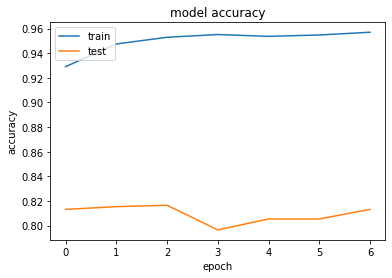

In [ ]:
# Plot the training/validation accuracy and loss

# Re-evaluate the model
loss, acc = lstm_model.evaluate(test_x, test_y, verbose=2)

# Plot the training/validation accuracy and loss
print(lstm_history.history.keys())
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Re-initialize the model
new_lstm_model = create_lstm_model()


In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
new_lstm_model.load_weights(checkpoint_path_lstm)


In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
test_loss, test_acc = new_lstm_model.evaluate(test_x,  test_y, verbose=2)


71/71 - 1s - loss: 1.0300 - accuracy: 0.7996 - 676ms/epoch - 10ms/step
